In [42]:
import pandas as pd
df= pd.read_csv(r'E:\Trim III\COVID-19\covid_19_india.csv')

In [43]:
df.head()

,Sno,Date,Time,State,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30-01-2020,6:00 PM,Kerala,1,0,0,0,1
1,2,31-01-2020,6:00 PM,Kerala,1,0,0,0,1
2,3,01-02-2020,6:00 PM,Kerala,2,0,0,0,2
3,4,02-02-2020,6:00 PM,Kerala,3,0,0,0,3
4,5,03-02-2020,6:00 PM,Kerala,3,0,0,0,3


In [50]:
df.Date = pd.to_datetime(df.Date)
#Resampling to daily frequency
df.index=df.Date
df=df.resample('D').mean()
#Resampling to monthly frequency
df_month=df.resample('M').mean()

In [51]:
df_month

,Sno,Cured,Deaths,Confirmed
Date,,,,
2020-01-31,3274.500000,57200.494562,1063.031464,66245.735692
2020-02-29,1545.267857,26868.234228,498.343127,31090.977221
2020-03-31,1627.966667,25372.371053,469.753034,29336.578389
2020-04-30,2237.741379,26625.743796,502.751211,31050.321597
2020-05-31,2847.350000,26880.335298,545.560797,32189.045188
2020-06-30,3557.551724,31248.062527,728.004050,38643.629178
2020-07-31,4251.483333,40513.109287,1011.704264,52541.348791
2020-08-31,4949.916667,67122.081665,1500.839948,84897.212410
2020-09-30,5606.051724,106867.534026,2079.239962,130026.218268


In [8]:
import matplotlib.pyplot as plt

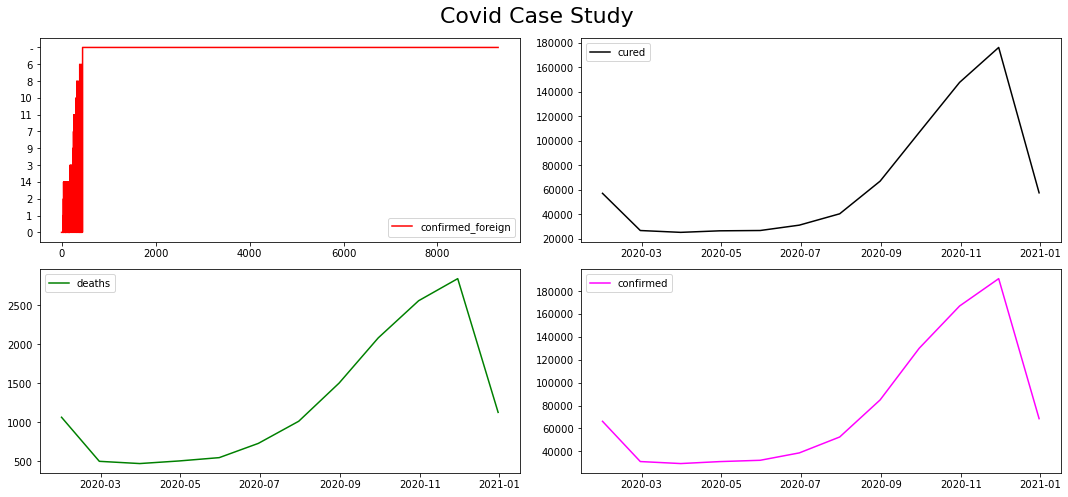

In [12]:
fig=plt.figure(figsize=[15,7])
plt.suptitle('Covid Case Study',fontsize=22)

plt.subplot(221)
plt.plot(df.ConfirmedForeignNational,'-',label='confirmed_foreign',color='red')
plt.legend()

plt.subplot(222)
plt.plot(df_month.Cured,'-', label='cured',color='black')
plt.legend()

plt.subplot(223)
plt.plot(df_month.Deaths,'-',label='deaths',color='green')
plt.legend()

plt.subplot(224)
plt.plot(df_month.Confirmed,'-',label='confirmed',color='magenta')
plt.legend()
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Confirmed', ylabel='State'>

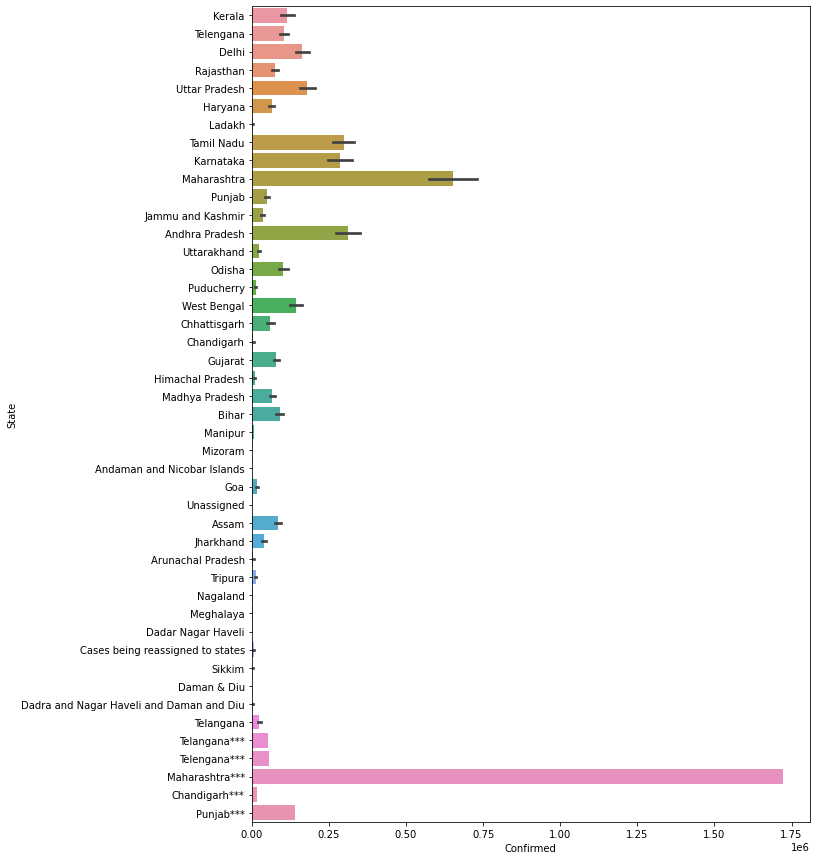

In [49]:
import seaborn as sns
plt.figure(figsize=(10,15))
sns.barplot(y ='State', x ='Confirmed', data = df)

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score
import csv, os

In [59]:
X = df_month.drop(["Confirmed"], axis=1)
y = df_month["Confirmed"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [63]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Linear Regression - Mean Squared Error:", mean_squared_error(y_pred, y_test))

model = SVR()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Support Vector Regression - Mean Squared Error:", mean_squared_error(y_pred, y_test))


model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Random Forest Regressor - Mean Squared Error:", mean_squared_error(y_pred, y_test))

Linear Regression - Mean Squared Error: 65063060.28428504
Support Vector Regression - Mean Squared Error: 13461384846.237724
Random Forest Regressor - Mean Squared Error: 3236871683.8182926
